# W51d2 2DGaussian Fitting PBCOR

#### ALMA Band 6 (1 mm = 226 GHz) continuum
`/orange/adamginsburg/w51/FITS/W51n_cont_briggsSC_tclean.image.fits`

In [5]:
directory1 = '/orange/adamginsburg/w51/FITS/W51n_cont_briggsSC_tclean.image.fits'

[[14.51798861 14.51798861 14.51798861 ... 14.51798861 14.51798861
  14.51798861]
 [14.51798944 14.51798944 14.51798944 ... 14.51798944 14.51798944
  14.51798944]
 [14.51799028 14.51799028 14.51799028 ... 14.51799028 14.51799028
  14.51799028]
 ...
 [14.51803611 14.51803611 14.51803611 ... 14.51803611 14.51803611
  14.51803611]
 [14.51803694 14.51803694 14.51803694 ... 14.51803694 14.51803694
  14.51803694]
 [14.51803778 14.51803778 14.51803778 ... 14.51803778 14.51803778
  14.51803778]] deg


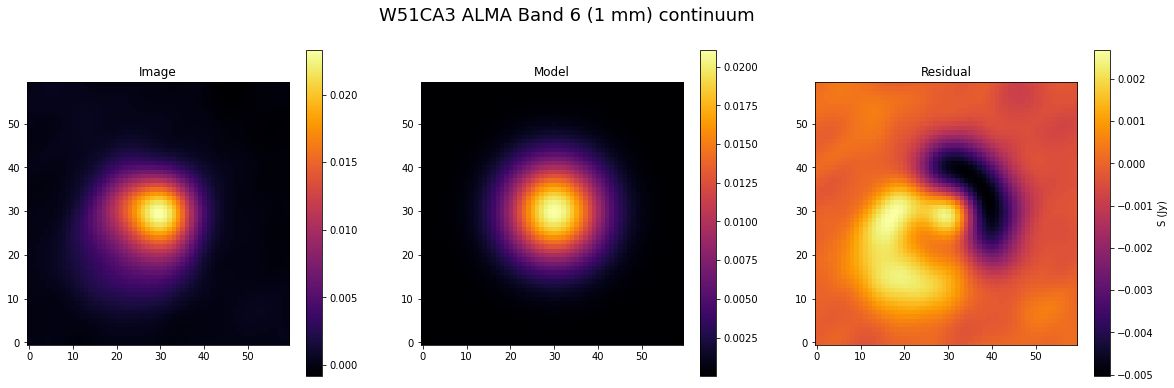

Parameter Error

2.106382375e-02 1.156574249e-03

2.909159058e+02 7.742565314e-09

1.451801358e+01 7.710445851e-09

6.654059135e-06 7.710628144e-09

6.686343476e-06 7.742653998e-09

1.450231410e+00 1.96684124e-01



In [18]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

#Accessing Cube Data
cube = SpectralCube.read(directory1, format='fits')
cube = cube[0,:,:]
x, y = 4654, 3311
size = 30

cube_cutout = cube[y - size:y + size, x - size:x + size]
yy, xx = cube_cutout.spatial_coordinate_map
print(yy)
cord = cube.world[y,x]

p_init_gauss2D = models.Gaussian2D(x_mean=xx[size, size], y_mean=yy[size, size], amplitude=1 * (u.Jy/u.beam),
                                   x_stddev=(0.024) * u.arcsec, y_stddev=(0.0241) * u.arcsec, theta=(np.pi/2)*u.rad)

fit_p = fitting.LevMarLSQFitter()


cube_cutout_quant = cube_cutout



with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)


p_init_gauss2D.theta.fixed = True

cov = np.diag(fit_p.fit_info['param_cov'])
errors = np.sqrt(cov)

amplitude_error=np.format_float_scientific(errors[0],precision=9)
x_mean_error=np.format_float_scientific(errors[1],precision=9)
y_mean_error=np.format_float_scientific(errors[2],precision=9)
x_stddev_error=np.format_float_scientific(errors[3],precision=9)
y_stddev_error=np.format_float_scientific(errors[4],precision=9)
theta_error=np.format_float_scientific(errors[5],precision=9)

amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)

              
plt.figure(figsize=(20, 6))
plt.suptitle("W51CA3 ALMA Band 6 (1 mm) continuum", fontsize=18)

plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')

plt.show()

#saveplotfig_gaussianfit()

print("Parameter" + ' ' + 'Error' +"\n")
print(amplitude + ' ' + amplitude_error +"\n")
print(x_mean + ' ' + x_mean_error +"\n")
print(y_mean + ' ' + y_mean_error +"\n")
print(x_stddev + ' ' + x_stddev_error +"\n")
print(y_stddev + ' ' + y_stddev_error +"\n")
print(theta + ' ' + theta_error +"\n")

#### ALMA Band 3 (3mm) continuum

`/orange/adamginsburg/w51/2017.1.00293.S/may2021_successful_imaging/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor`




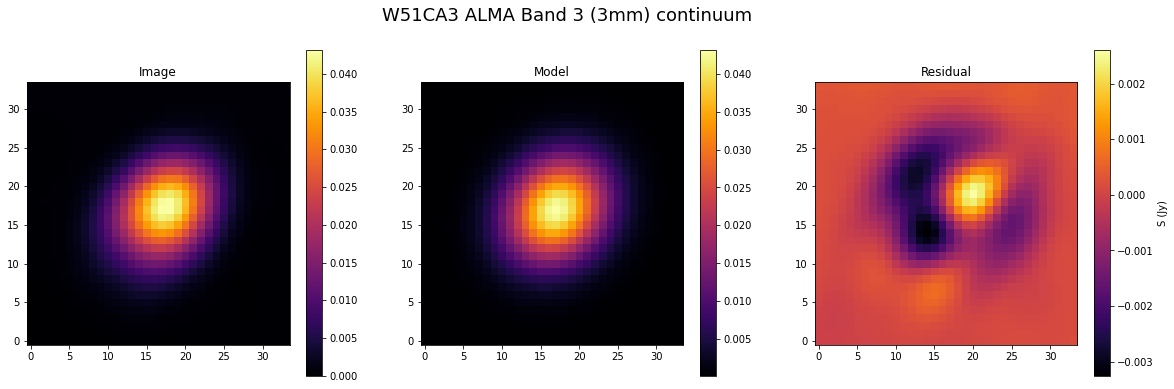

Parameter Error

4.313024293e-02 9.608167991e-04

1.451800889e+01 8.699555488e-09

2.909159074e+02 8.699536429e-09

8.310219208e-06 8.006807344e-09

9.718395690e-06 9.341386440e-09

7.867661033e-01 4.390064122e-03



In [24]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

from astropy.visualization import quantity_support
import pylab as pl

#Saving methods
directory1 = '/orange/adamginsburg/w51/2017.1.00293.S/may2021_successful_imaging/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor'

#Accessing Cube Data
cube = SpectralCube.read(directory1, format='casa_image')
cube = cube[0,:,:]
x, y = 7628, 7226
size = 17

cube_cutout = cube[y - size:y + size, x - size:x + size]
xx, yy = cube_cutout.spatial_coordinate_map

cord = cube.world[y,x]

# print("cord (cube.world[y,x])", cord, '\n')
# print("xx, yy (cube_cutout.spatial_coordinate_map)",yy, xx, '\n')

p_init_gauss2D = models.Gaussian2D(x_mean=xx[size, size], y_mean=yy[size, size], amplitude=1 * (u.Jy/u.beam),
                                   x_stddev=(0.03) * u.arcsec, y_stddev=(0.035) * u.arcsec, theta = (np.pi/4) * u.rad)

fit_p = fitting.LevMarLSQFitter()


cube_cutout_quant = cube_cutout

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)

cov = np.diag(fit_p.fit_info['param_cov'])
errors = np.sqrt(cov)

amplitude_error=np.format_float_scientific(errors[0],precision=9)
x_mean_error=np.format_float_scientific(errors[1],precision=9)
y_mean_error=np.format_float_scientific(errors[2],precision=9)
x_stddev_error=np.format_float_scientific(errors[3],precision=9)
y_stddev_error=np.format_float_scientific(errors[4],precision=9)
theta_error=np.format_float_scientific(errors[5],precision=9)

amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)

plt.figure(figsize=(20, 6))
plt.suptitle("W51CA3 ALMA Band 3 (3mm) continuum", fontsize=18)

plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')

plt.show()

print("Parameter" + ' ' + 'Error' +"\n")
print(amplitude + ' ' + amplitude_error +"\n")
print(x_mean + ' ' + x_mean_error +"\n")
print(y_mean + ' ' + y_mean_error +"\n")
print(x_stddev + ' ' + x_stddev_error +"\n")
print(y_stddev + ' ' + y_stddev_error +"\n")
print(theta + ' ' + theta_error +"\n")

#### VLA Q-band (0.7 cm = 46.99 GHz) continuum
`/orange/adamginsburg/w51/vla/16B-202_W51QKa/merge/W51North_QbandAarray_cont_spws_continuum_cal_clean_2terms_robust0_wproj_selfcal16_final.image.tt0.pbcor.fits`

In [1]:
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.io import fits
import radio_beam
from radio_beam import Beam
import numpy as np

directory3 = '/orange/adamginsburg/w51/vla/16B-202_W51QKa/merge/W51North_QbandAarray_cont_spws_continuum_cal_clean_2terms_robust0_wproj_selfcal16_final.image.tt0.pbcor.fits'

#cube = SpectralCube.read(directory3, format='fits')
#cube[0].header

hdul = fits.open(directory3)
hdu = hdul[0]
header = hdu.header
beam = Beam.from_fits_header(header) # I think this is right but you can look i tup
data = hdu.data * u.Unit(hdu.header['BUNIT'])

#plt.imshow(data, origin='lower', cmap='inferno')

In [16]:
x, y = 4328, 3942
size = 10

data_cutout = data[y - size:y + size, x - size:x + size]

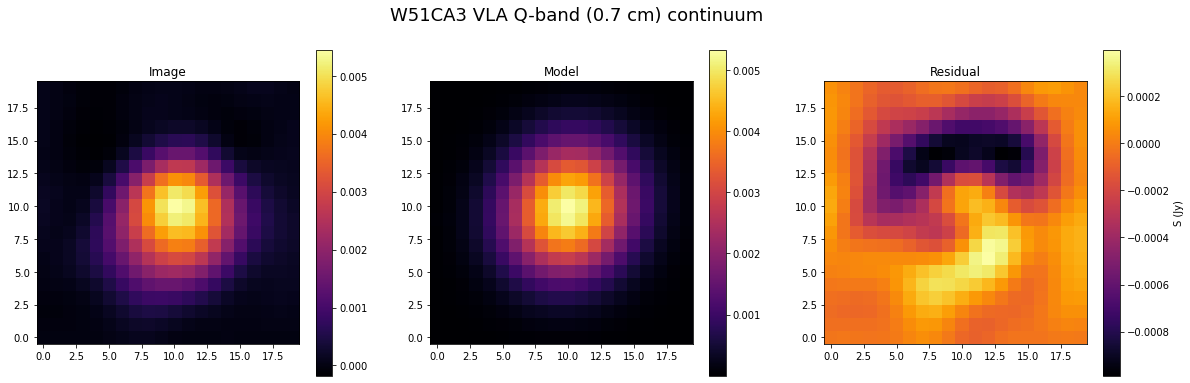

Parameter Error

5.348074374e-03 4.054327673e-04

2.909159087e+02 1.942722490e-07

1.451801043e+01 1.943063615e-07

8.93687089e-06 1.859067438e-07

9.669029475e-06 2.029168274e-07

7.704021317e-01 1.648433770e-01



In [17]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u
from astropy.wcs import WCS
import warnings

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ww = WCS(header)

ypixel_grid, xpixel_grid = np.mgrid[y - size:y + size, x - size:x + size]
xx, yy = ww.pixel_to_world_values(xpixel_grid, ypixel_grid)

xx = (xx * u.deg)
yy = (yy * u.deg)

p_init_gauss2D = models.Gaussian2D(x_mean=xx[size, size], y_mean=yy[size, size], amplitude=0.02 * (u.Jy/u.beam),
                                   x_stddev= (0.033) * u.arcsec, y_stddev=(0.036) * u.arcsec, theta = (np.pi/4) * u.rad)
#p_init_gauss2D.amplitude.fixed = True

fit_p = fitting.LevMarLSQFitter()

data_cutout_quant = data_cutout

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, data_cutout_quant)
    
cov = np.diag(fit_p.fit_info['param_cov'])
errors = np.sqrt(cov)

amplitude_error=np.format_float_scientific(errors[0],precision=9)
x_mean_error=np.format_float_scientific(errors[1],precision=9)
y_mean_error=np.format_float_scientific(errors[2],precision=9)
x_stddev_error=np.format_float_scientific(errors[3],precision=9)
y_stddev_error=np.format_float_scientific(errors[4],precision=9)
theta_error=np.format_float_scientific(errors[5],precision=9)

amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)

plt.figure(figsize=(20, 6))
plt.suptitle("W51CA3 VLA Q-band (0.7 cm) continuum",fontsize = 18)

plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(data_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(data_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')

plt.show()

print("Parameter" + ' ' + 'Error' +"\n")
print(amplitude + ' ' + amplitude_error +"\n")
print(x_mean + ' ' + x_mean_error +"\n")
print(y_mean + ' ' + y_mean_error +"\n")
print(x_stddev + ' ' + x_stddev_error +"\n")
print(y_stddev + ' ' + y_stddev_error +"\n")
print(theta + ' ' + theta_error +"\n")

switch the Q-band data you're using to /orange/adamginsburg/w51/vla/16B-202_W51QKa/merge/W51North_QbandAarray_cont_spws_continuum_cal_clean_2terms_robust0_incrementalselfcal10.image.tt0.pbcor.fits

In [19]:
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.io import fits
import radio_beam
from radio_beam import Beam
import numpy as np

directory3 = '/orange/adamginsburg/w51/vla/16B-202_W51QKa/merge/W51North_QbandAarray_cont_spws_continuum_cal_clean_2terms_robust0_incrementalselfcal10.image.tt0.pbcor.fits'

#cube = SpectralCube.read(directory3, format='fits')
#cube[0].header

hdul = fits.open(directory3)
hdu = hdul[0]
header = hdu.header
beam = Beam.from_fits_header(header) # I think this is right but you can look i tup
data = hdu.data * u.Unit(hdu.header['BUNIT'])

#plt.imshow(data, origin='lower', cmap='inferno')
header

SIMPLE  =                    T /Standard FITS                                   
BITPIX  =                  -32 /Floating point (32 bit)                         
NAXIS   =                    2                                                  
NAXIS1  =                 1024                                                  
NAXIS2  =                 1024                                                  
EXTEND  =                    T                                                  
BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 
BZERO   =   0.000000000000E+00                                                  
BMAJ    =   1.280000122885E-05                                                  
BMIN    =   9.402085302605E-06                                                  
BPA     =  -6.654223632812E+01                                                  
BTYPE   = 'Intensity'                                                           
OBJECT  = '        '        

In [24]:
x, y = 717, 327
size = 10

data_cutout = data[y - size:y + size, x - size:x + size]

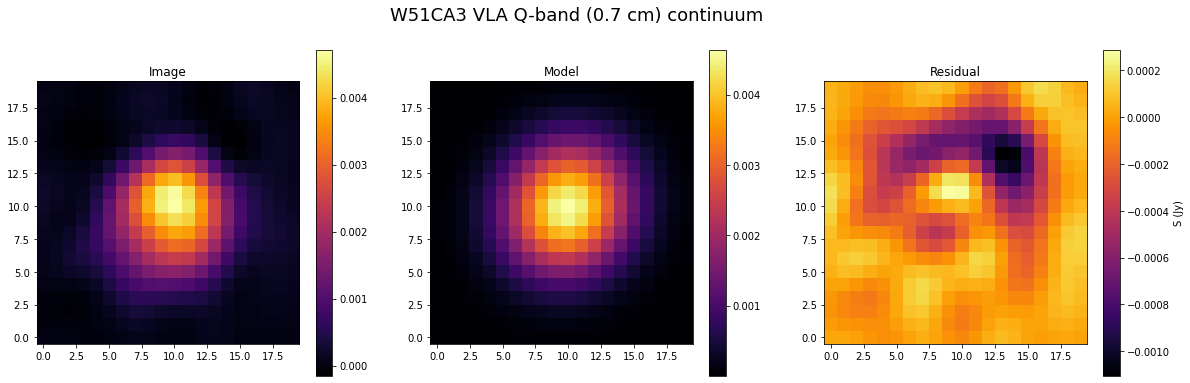

Parameter Error

4.645397966e-03 3.550289640e-04

2.909159078e+02 1.701201307e-07

1.451800990e+01 1.701500021e-07

8.956301125e-06 1.627946335e-07

9.641879364e-06 1.776900060e-07

7.691724812e-01 1.443498851e-01



In [25]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u
from astropy.wcs import WCS
import warnings

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ww = WCS(header)

ypixel_grid, xpixel_grid = np.mgrid[y - size:y + size, x - size:x + size]
xx, yy = ww.pixel_to_world_values(xpixel_grid, ypixel_grid)

xx = (xx * u.deg)
yy = (yy * u.deg)

p_init_gauss2D = models.Gaussian2D(x_mean=xx[size, size], y_mean=yy[size, size], amplitude=0.02 * (u.Jy/u.beam),
                                   x_stddev= (0.033) * u.arcsec, y_stddev=(0.036) * u.arcsec, theta = (np.pi/4) * u.rad)
#p_init_gauss2D.amplitude.fixed = True

fit_p = fitting.LevMarLSQFitter()

data_cutout_quant = data_cutout

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, data_cutout_quant)
    
cov = np.diag(fit_p.fit_info['param_cov'])
errors = np.sqrt(cov)

amplitude_error=np.format_float_scientific(errors[0],precision=9)
x_mean_error=np.format_float_scientific(errors[1],precision=9)
y_mean_error=np.format_float_scientific(errors[2],precision=9)
x_stddev_error=np.format_float_scientific(errors[3],precision=9)
y_stddev_error=np.format_float_scientific(errors[4],precision=9)
theta_error=np.format_float_scientific(errors[5],precision=9)

amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)

plt.figure(figsize=(20, 6))
plt.suptitle("W51CA3 VLA Q-band (0.7 cm) continuum",fontsize = 18)

plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(data_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(data_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')

plt.show()

print("Parameter" + ' ' + 'Error' +"\n")
print(amplitude + ' ' + amplitude_error +"\n")
print(x_mean + ' ' + x_mean_error +"\n")
print(y_mean + ' ' + y_mean_error +"\n")
print(x_stddev + ' ' + x_stddev_error +"\n")
print(y_stddev + ' ' + y_stddev_error +"\n")
print(theta + ' ' + theta_error +"\n")

## FK5 ICRS Conversion

In [7]:
from astropy import coordinates, units as u

coordinates.SkyCoord('19:23:45.05','17:30:30', unit=(u.hour, u.deg), frame='fk5').fk5

<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (290.93770833, 17.50833333)>

In [8]:
from astropy import coordinates, units as u

coordinates.SkyCoord('19:23:45.05','17:30:30', unit=(u.hour, u.deg), frame='fk5').icrs

<SkyCoord (ICRS): (ra, dec) in deg
    (290.93770209, 17.50832727)>

#### Finding the Coordinate System for Each FITS

In [9]:
directory1 = '/orange/adamginsburg/w51/FITS/W51n_cont_briggsSC_tclean.image.fits'
directory2 = '/orange/adamginsburg/w51/2017.1.00293.S/may2021_imaging/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0'
directory3 = '/orange/adamginsburg/w51/vla/16B-202_W51QKa/merge/W51North_QbandAarray_cont_spws_continuum_cal_clean_2terms_robust0_wproj_selfcal16_final.image.tt0'

ALMA_Band_6_cube = SpectralCube.read(directory1, format='casa_image')
ALMA_Band_3_cube = SpectralCube.read(directory2, format='casa_image')
VLA_QBand_cube   = SpectralCube.read(directory3, format='casa_image')

NotADirectoryError: [Errno 20] Not a directory: '/orange/adamginsburg/w51/FITS/W51n_cont_briggsSC_tclean.image.fits/table.f0'

In [6]:
directory1 = '/orange/adamginsburg/w51/FITS/W51n_cont_briggsSC_tclean.image.fits'
cube = SpectralCube.read(directory1, format='fits')
cube1 = cube[0,:,:]

directory2 = '/orange/adamginsburg/w51/2017.1.00293.S/may2021_successful_imaging/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor'
cube = SpectralCube.read(directory2, format='casa_image')
cube2 = cube[0,:,:]

directory3 = '/orange/adamginsburg/w51/vla/16B-202_W51QKa/merge/W51North_QbandAarray_cont_spws_continuum_cal_clean_2terms_robust0_wproj_selfcal16_final.image.tt0.pbcor.fits'
hdul = fits.open(directory3)
hdu = hdul[0]
header = hdu.header
beam = Beam.from_fits_header(header) # I think this is right but you can look i tup
data = hdu.data * u.Unit(hdu.header['BUNIT'])

In [25]:
x, y = 4654, 3311
size = 30

cube_cutout1 = cube1[y - size:y + size, x - size:x + size]

In [45]:
x, y = 7628, 7226
size = 17

cube_cutout2 = cube2[y - size:y + size, x - size:x + size]

In [46]:
x, y = 4328, 3942
size = 10

data_cutout = data[y - size:y + size, x - size:x + size]

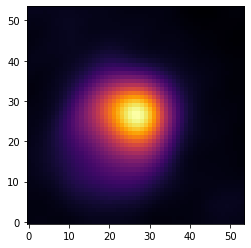

In [47]:
plt.imshow(cube_cutout1.value, origin='lower', cmap='inferno')

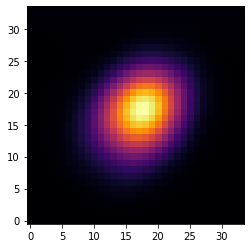

In [48]:
plt.imshow(cube_cutout2.value, origin='lower', cmap='inferno')

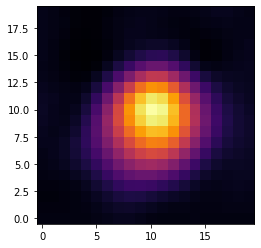

In [40]:
plt.imshow(data_cutout.value, origin='lower', cmap='inferno')

In [ ]:
plt.imshow(cube_cutout2.value, origin='lower', cmap='inferno')